In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import os

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [28]:
index_type = 'lipp'
NS_TO_MS = 1 / 1e6
NS_TO_S = 1 / 1e9
QPS_TO_MQPS = 1 / 1e6
NUM_QUERIES = 500000000

In [29]:
def save_fig(fig, filename):
    fig.savefig(os.path.join('/home/grad2/ndhuynh/transfer', filename), dpi=300, format='pdf', bbox_inches='tight')

In [30]:
with sqlite3.connect("../experiment_feb_29.db") as con:
    table_bliss = pd.read_sql(f"SELECT * FROM bliss_bench", con)
    table_rocks = pd.read_sql(f"SELECT * FROM rocksdb_bliss", con)

In [31]:
table_bliss["preload_tp"] = (table_bliss["preload_factor"] * NUM_QUERIES / (table_bliss["preload_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["write_tp"] = (table_bliss["write_factor"] * NUM_QUERIES / (table_bliss["write_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["read_tp"] = (table_bliss["read_factor"] * NUM_QUERIES / (table_bliss["read_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["mixed_tp"] = (table_bliss["mixed_ratio"] * NUM_QUERIES / (table_bliss["mixed_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["total_tp"] = table_bliss[["preload_tp", "write_tp", "read_tp", "mixed_tp"]].sum(axis=1)

In [32]:
table_alex = table_bliss.query("use_preload == 1 and index_type == 'alex'")
table_lipp = table_bliss.query("use_preload == 1 and index_type == 'lipp'")

In [33]:
table_bliss.describe()

,id,k_pt,l_pt,preload_factor,write_factor,read_factor,mixed_ratio,use_preload,preload_time,preload_creation_time,write_time,mixed_time,read_time,preload_tp,write_tp,read_tp,mixed_tp,total_tp
count,177.000000,177.000000,177.000000,1.770000e+02,1.770000e+02,1.770000e+02,177.0,177.000000,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000
mean,89.000000,17.135593,28.570621,4.000000e-01,4.000000e-01,2.000000e-01,0.5,0.497175,4.145479e+10,1.066009e+10,6.941060e+10,2.788730e+10,1.219493e+10,inf,inf,inf,inf,inf
std,51.239633,21.227762,34.850278,4.453490e-16,4.453490e-16,2.226745e-16,0.0,0.501410,2.726857e+10,5.898962e+09,4.048073e+10,2.092105e+10,1.611037e+10,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.465145,0.732848,1.203451,1.929079,5.609081
25%,45.000000,3.000000,3.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,0.000000,1.709560e+10,5.204423e+09,5.092338e+10,1.861214e+10,4.915350e+09,3.437831,2.442883,8.727289,8.358642,34.922129
50%,89.000000,5.000000,10.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,0.000000,4.120676e+10,7.032149e+09,6.110057e+10,2.149574e+10,5.385850e+09,4.853573,3.273292,18.567170,11.630209,39.787189
75%,133.000000,25.000000,50.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,1.000000,5.817622e+10,1.486444e+10,8.187047e+10,2.990917e+10,1.145831e+10,11.698915,3.927469,20.344430,13.432091,45.233943
max,177.000000,100.000000,100.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,1.000000,1.365052e+11,2.572655e+10,2.729080e+11,1.295955e+11,8.309435e+10,inf,inf,inf,inf,inf


In [34]:
table_rocks.describe()

,id,k_pt,l_pt,ingestion_time,num_inserts,bytes_written,num_compactions,num_files_trivial,bytes_moved_trivial,trivial_if_cond_accesses
count,44.000000,44.000000,44.000000,4.400000e+01,44.0,4.400000e+01,44.000000,44.000000,4.400000e+01,44.000000
mean,22.500000,17.227273,28.727273,1.908436e+12,500000000.0,1.400000e+10,589.727273,77.022727,2.407417e+09,68.772727
std,12.845233,21.437702,35.190091,1.810326e+11,0.0,0.000000e+00,79.378506,75.064775,1.866433e+09,40.416358
min,1.000000,0.000000,0.000000,1.300152e+12,500000000.0,1.400000e+10,297.000000,30.000000,8.736230e+08,29.000000
25%,11.750000,3.000000,3.000000,1.782753e+12,500000000.0,1.400000e+10,569.750000,39.750000,1.448305e+09,39.500000
50%,22.500000,7.500000,10.000000,1.941513e+12,500000000.0,1.400000e+10,582.500000,58.500000,1.878496e+09,58.500000
75%,33.250000,25.000000,50.000000,2.050414e+12,500000000.0,1.400000e+10,617.250000,94.500000,2.831910e+09,90.750000
max,44.000000,100.000000,100.000000,2.209895e+12,500000000.0,1.400000e+10,809.000000,524.000000,1.297666e+10,258.000000


In [35]:
def plot_heatmap(df: pd.DataFrame, value: str = 'preload_time', data_scale=1, fillna=False, ax = None, **heatmap_kwargs):
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    data = data * data_scale
    if fillna:
        data.iloc[-1] = data.iloc[-1].fillna(data.iloc[-1][100])
        data.loc[:, 100] = data.loc[:, 100].fillna(data.iloc[-1][100])
        data.loc[0, :] = data.loc[0][0]
        data.loc[:, 0] = data.loc[0][0]
   
    if ax is None:
        ax = sns.heatmap(data, **heatmap_kwargs)
    else:
        sns.heatmap(data, ax=ax, **heatmap_kwargs)
    _ = ax.invert_yaxis()
    _ = ax.set(xticklabels=data.columns.map(int), yticklabels=data.index.map(int))
    _ = ax.set(xlabel='K', ylabel='L')
    
    return ax, data

In [76]:
table_rocks["ingestion_qps"] = (table_rocks["num_inserts"] / (table_rocks["ingestion_time"] * NS_TO_S))
table_rocks["kqps"] = table_rocks["ingestion_qps"] / 1e3

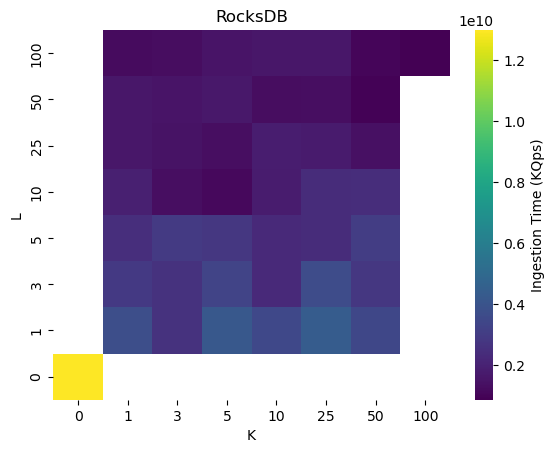

In [94]:
fig, ax = plt.subplots()
heatmap_kwargs = {'annot': False, 'fmt': '.0f', 'cmap': 'viridis'}
_, data = plot_heatmap(table_rocks, ax=ax, value="bytes_moved_trivial", **heatmap_kwargs)
ax.set_title("RocksDB")
ax.collections[0].colorbar.set_label("Ingestion Time (KQps)")

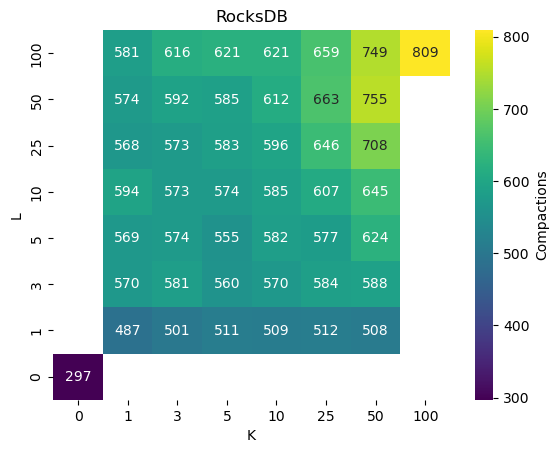

In [85]:
fig, ax = plt.subplots()
heatmap_kwargs = {'annot': True, 'fmt': '.0f', 'cmap': 'viridis'}
_, data = plot_heatmap(table_rocks, ax=ax, value="num_compactions", fillna=True, **heatmap_kwargs)
ax.set_title("RocksDB")
ax.collections[0].colorbar.set_label("Compactions")

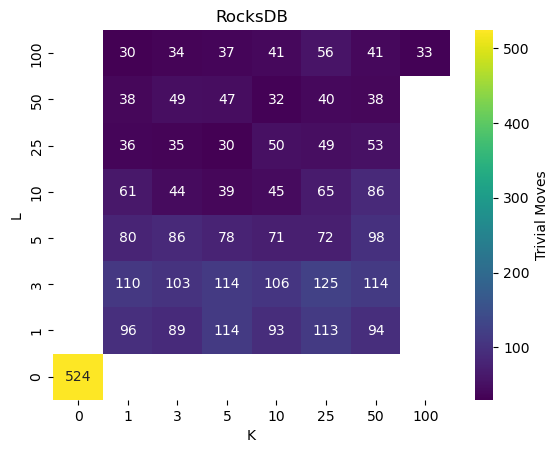

In [86]:
fig, ax = plt.subplots()
heatmap_kwargs = {'annot': True, 'fmt': '.0f', 'cmap': 'viridis'}
_, data = plot_heatmap(table_rocks, ax=ax, value="num_files_trivial", **heatmap_kwargs)
ax.set_title("RocksDB")
ax.collections[0].colorbar.set_label("Trivial Moves")

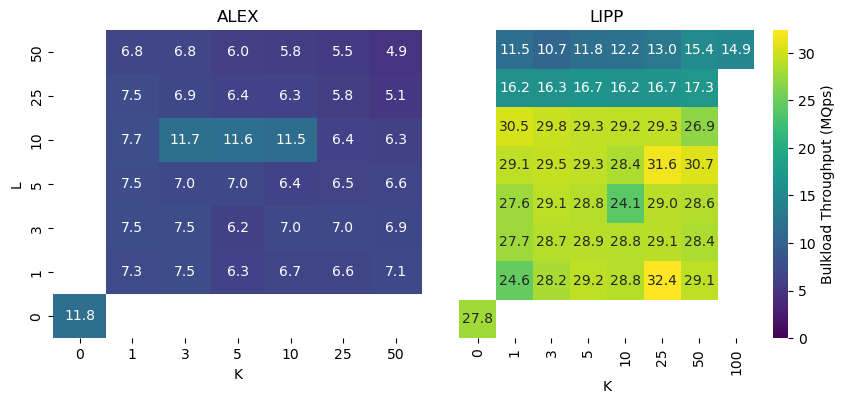

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
heatmap_kwargs = {'annot': True, 'fmt': '.1f', 'cmap': 'viridis'}
value = "preload_tp"

# talex = table_alex[(table_alex.k_pt != 0) & (table_alex.k_pt != 100) & (table_alex.l_pt != 100)]
# tlipp = table_lipp[(table_lipp.k_pt != 0) & (table_lipp.k_pt != 100) & (table_lipp.l_pt != 100)]
talex = table_alex[(table_alex.l_pt != 100)]
tlipp = table_lipp
vmax = max(talex[value].max(), tlipp[value].max())

for index, df, ax in [("alex", talex, axes[0]), ("lipp", tlipp, axes[1])]:
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    sns.heatmap(data, ax=ax, cbar=(index == "lipp"), vmin=0, vmax=vmax, **heatmap_kwargs)
    ax.invert_yaxis()
    ax.set(xticklabels=data.columns.map(int), xlabel="K")
    if index == "lipp":
        ax.set(yticklabels=[], ylabel="", yticks=[])
    else:
        ax.set(yticklabels=data.index.map(int), ylabel="L")

axes[0].set_title("ALEX")
axes[1].set_title("LIPP")
axes[1].collections[0].colorbar.set_label("Bulkload Throughput (MQps)")
plt.subplots_adjust(wspace=0.1, hspace=0)

save_fig(fig, "learned_index_bulkload.pdf")

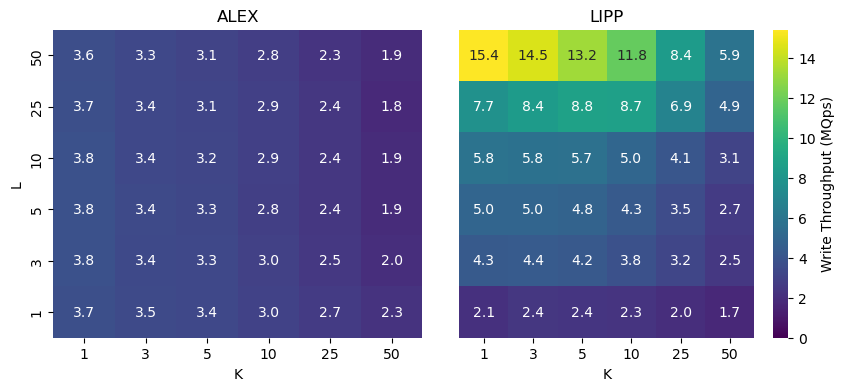

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
heatmap_kwargs = {'annot': True, 'fmt': '.1f', 'cmap': 'viridis'}
value = "write_tp"

talex = table_alex[(table_alex.k_pt != 0) & (table_alex.k_pt != 100) & (table_alex.l_pt != 100)]
tlipp = table_lipp[(table_lipp.k_pt != 0) & (table_lipp.k_pt != 100) & (table_lipp.l_pt != 100)]
vmax = max(talex[value].max(), tlipp[value].max())
for index, df, ax in [("alex", talex, axes[0]), ("lipp", tlipp, axes[1])]:
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    sns.heatmap(data, ax=ax, cbar=(index == "lipp"), vmin=0, vmax=vmax, **heatmap_kwargs)
    ax.invert_yaxis()
    ax.set(xticklabels=data.columns.map(int), xlabel="K")
    if index == "lipp":
        ax.set(yticklabels=[], ylabel="", yticks=[])
    else:
        ax.set(yticklabels=data.index.map(int), ylabel="L")

axes[0].set_title("ALEX")
axes[1].set_title("LIPP")
axes[1].collections[0].colorbar.set_label("Write Throughput (MQps)")
plt.subplots_adjust(wspace=0.1, hspace=0)

save_fig(fig, "learned_index_write.pdf")

[[Text(0, 0, 'Sorted'), Text(1, 0, 'Scrambled')],
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Preload Throughput (MQps)')]

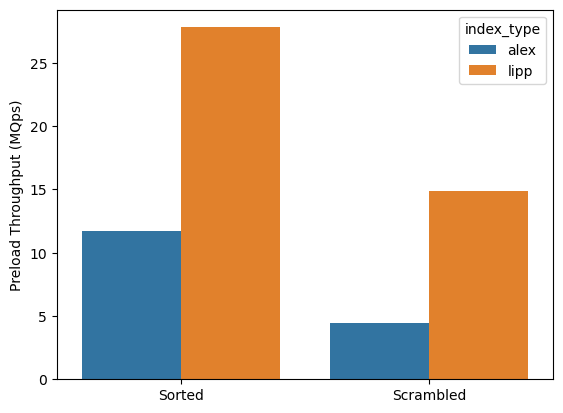

In [65]:
data = table_bliss.query("use_preload == 1 and (l_pt == 0 or l_pt == 100) and (k_pt == 0 or k_pt == 100)")
# data.loc[:, ["preload_time"]] = (data.loc[:, ["preload_time"]] * NS_TO_S).astype(int)
ax = sns.barplot(data, x="k_pt", y="preload_tp", hue="index_type")
ax.set(xticklabels=["Sorted", "Scrambled"], xlabel="", ylabel="Preload Throughput (MQps)")

[[Text(0, 0, 'Sorted'), Text(1, 0, 'Scrambled')],
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Write Throughput (MQps)')]

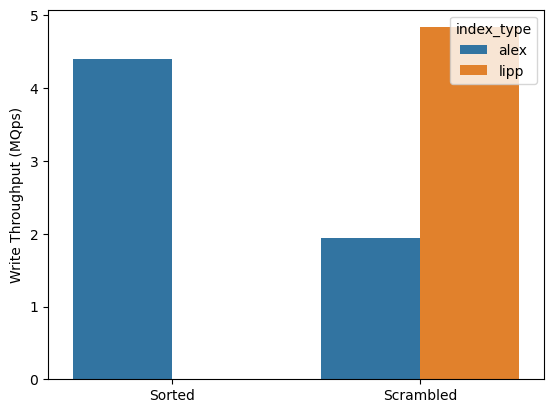

In [67]:
data = table_bliss.query("use_preload == 1 and (l_pt == 0 or l_pt == 100) and (k_pt == 0 or k_pt == 100)")
# data.loc[:, ["write_time"]] = (data.loc[:, ["write_time"]] * NS_TO_S).astype(int)
ax = sns.barplot(data, x="k_pt", y="write_tp", hue="index_type")
ax.set(xticklabels=["Sorted", "Scrambled"], xlabel="", ylabel="Write Throughput (MQps)")

In [54]:
vals = (
    table_bliss.query("index_type == 'alex' and use_preload == 1 and k_pt == 0 and l_pt == 0").preload_time.values[0],
    table_bliss.query("index_type == 'alex' and use_preload == 1 and k_pt == 100 and l_pt == 100").preload_time.values[0],
    table_bliss.query("index_type == 'lipp' and use_preload == 1 and k_pt == 0 and l_pt == 0").preload_time.values[0],
    table_bliss.query("index_type == 'lipp' and use_preload == 1 and k_pt == 100 and l_pt == 100").preload_time.values[0]
)
vals

(17021071516, 44690243813, 7192594828, 13428673829)